# 1 Dataset Exploration

## Importing libraries

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
SEED_VALUE = 42

np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## 1.1 Load the Boston Housing Dataset

In [5]:
(X_train , y_train) , (X_test , y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 [==============================] - 0s 1us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


## 1.2 Extract Features from the DatasetIn this notebook I only going to use a single feature from the dataset, so to keep things simple, I will store the feature data in a new variable.



In [7]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:,boston_features["Average Number of Rooms"]]
X_test_1d = X_test[:,boston_features["Average Number of Rooms"]]

print(X_train_1d.shape , X_test_1d.shape)

(404,) (102,)


## 1.3 Plot the Features

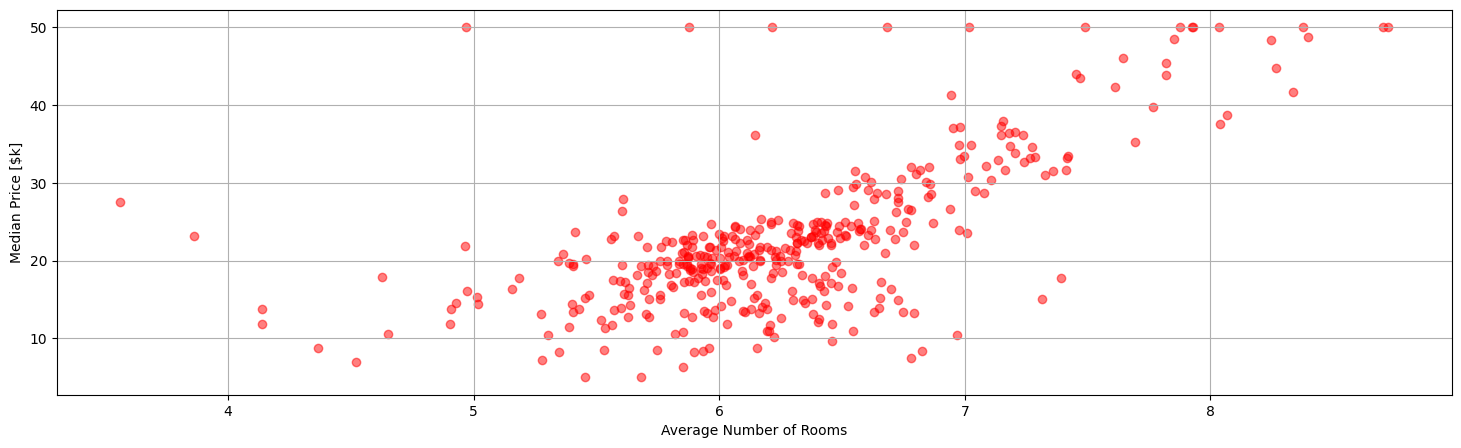

In [10]:
plt.figure(figsize=(18,5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$k]")
plt.grid("on")
plt.scatter(X_train_1d[:] , y_train , color = "red" , alpha=0.5)

## 2 Linear Regression Model


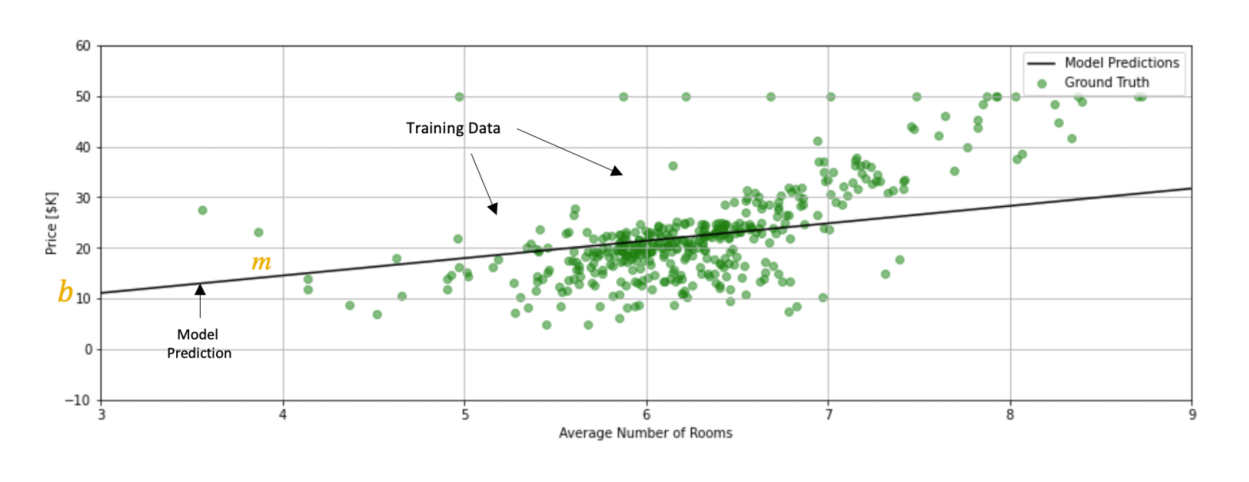

In [14]:
import cv2
plt.figure(figsize=(18,6))
plt.imshow(cv2.imread("linear.webp"))
plt.axis("off")
plt.show()

## 3 Neural Network Perspective and Terminology

The figure below shows how this model can be represented as a simple (single neuron) network. We will use this simple example to introduce neural network components and terminology. The input data (
x) consists of a single feature (average number of rooms), and the predicted output (y′) is a scalar (predicted median price of a home). 

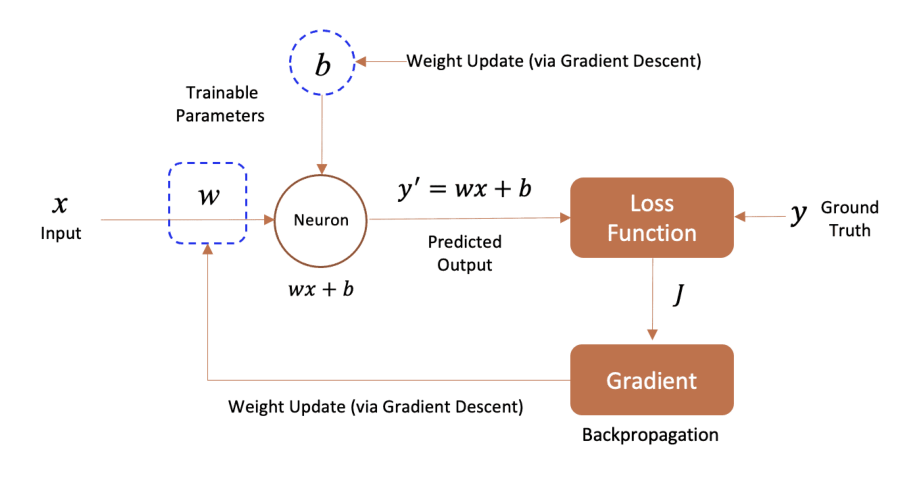

In [17]:
plt.figure(figsize=(18,6))
plt.imshow(cv2.imread("diagram2.webp"))
plt.axis("off")
plt.show()

The network contains just a single neuron that takes a single input (
x
) and produces a single output (
y
′
) which is the predicted (average) price of a home. The single neuron has two trainable parameters, which are the slope (
m
) and y-intercept (
b
) of the linear model. These parameters are more generally known as the weight and bias, respectively. 

The Loss Function we use can take many forms. For this example, we will use Mean Squared Error (MSE) which is a very common loss function used in regression problems.

## 4 Modeling a Neural Network in Keras

1. Build/Define a network model using predefined layers in Keras.
2. Compile the model with model.compile()
3. Train the model with model.fit()
4. Predict the output model.predict()

### 4.1 Define the Keras Model


In [18]:
model = Sequential()

model.add(Dense(units=1 , input_shape = (1, )))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.2 Compile the Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

### 4.3 Train the Model


In [20]:
history = model.fit(
    X_train_1d, 
    y_train, 
    batch_size=16, 
    epochs=101, 
    validation_split=0.3,
)

Epoch 1/101

18/18 [==============================] - 1s 9ms/step - loss: 499.4235 - val_loss: 567.7641
Epoch 2/101
18/18 [==============================] - 0s 3ms/step - loss: 468.9293 - val_loss: 538.6211
Epoch 3/101
18/18 [==============================] - 0s 3ms/step - loss: 442.9519 - val_loss: 511.5568
Epoch 4/101
18/18 [==============================] - 0s 3ms/step - loss: 418.3615 - val_loss: 485.2682
Epoch 5/101
18/18 [==============================] - 0s 3ms/step - loss: 394.2503 - val_loss: 459.3915
Epoch 6/101
18/18 [==============================] - 0s 2ms/step - loss: 371.0163 - val_loss: 434.7324
Epoch 7/101
18/18 [==============================] - 0s 2ms/step - loss: 348.7935 - val_loss: 410.6651
Epoch 8/101
18/18 [==============================] - 0s 2ms/step - loss: 327.5112 - val_loss: 388.0761
Epoch 9/101
18/18 [==============================] - 0s 2ms/step - loss: 307.0222 - val_loss: 365.7693
Epoch 10/101
18/18 [==============================] - 0s 2ms/step - loss

### 4.4 Plot the Training Results


In [24]:
def plot_losses(history):
    plt.figure(figsize=(18,6))
    plt.plot(history.history['loss'] , 'g' , label = "Training loss")
    plt.plot(history.history['val_loss'] , 'b' , label = "Validation loss")
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

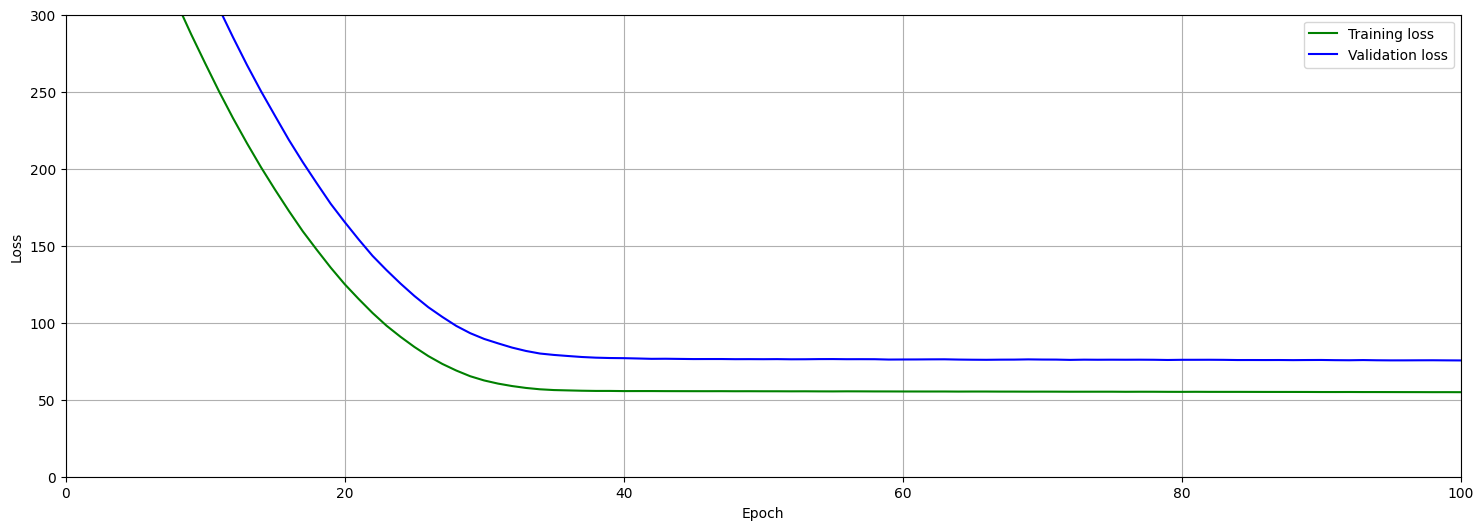

In [25]:
plot_losses(history)

### 4.5 Make Predictions using the Model


In [27]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
     print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 0s 80ms/step
Predicted price of a home with 3 rooms: $11.6K
Predicted price of a home with 4 rooms: $14.9K
Predicted price of a home with 5 rooms: $18.1K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.6K


### 4.6 Plot the Model and the Data


In [28]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 37ms/step


In [29]:
def plot_data(x_data, y_data, x, y, title=None):
    
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

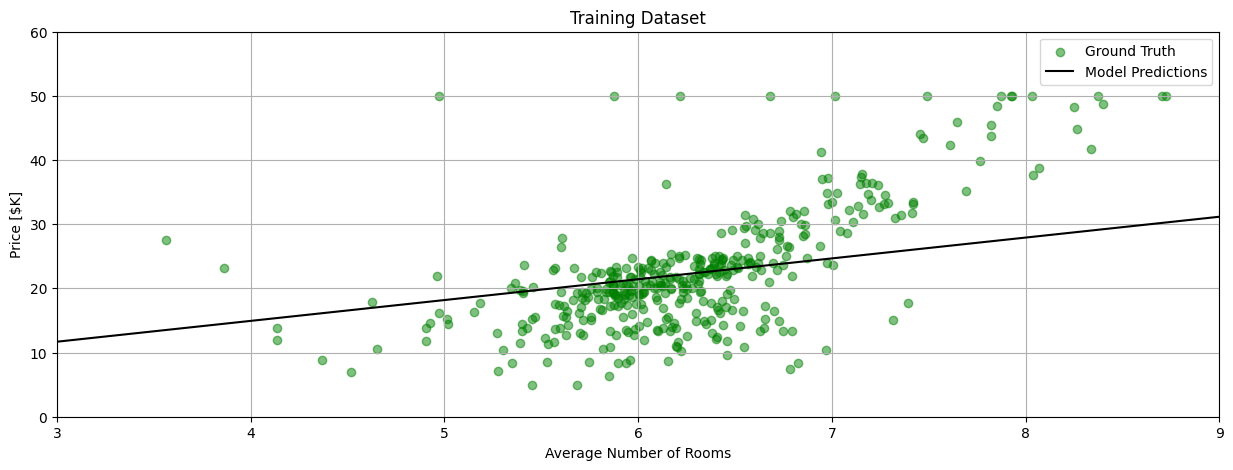

In [30]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')


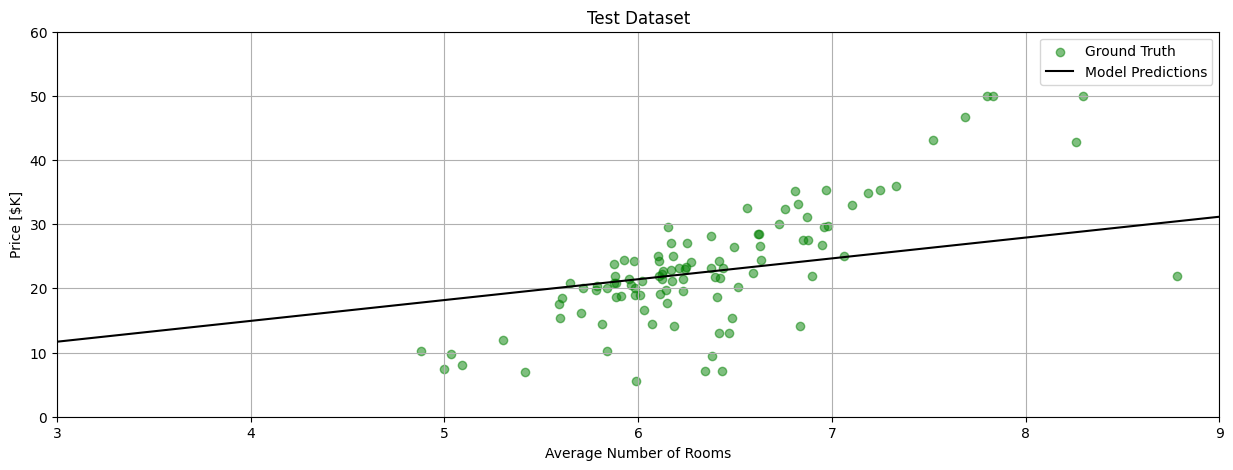

In [31]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')
